In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Irochka\Downloads\housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.shape

(20640, 10)

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()   

#always run info() to see the datatypes of each column
#Dtype object means string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Exploratory Data Analysis (EDA)

### Feature Engineering: 
Add new attributes that can help better predict values in our model

- Average Rooms per House
- Average Bedrooms per House
- Number of people per Household

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
df["Avg Rooms"] = df["total_rooms"] /  df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Avg Rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [11]:
df["Avg Bedrooms"] = df["total_bedrooms"] /  df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Avg Rooms,Avg Bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920


In [12]:
df["Num People per Household"] = df["population"] / df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Avg Rooms,Avg Bedrooms,Num People per Household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


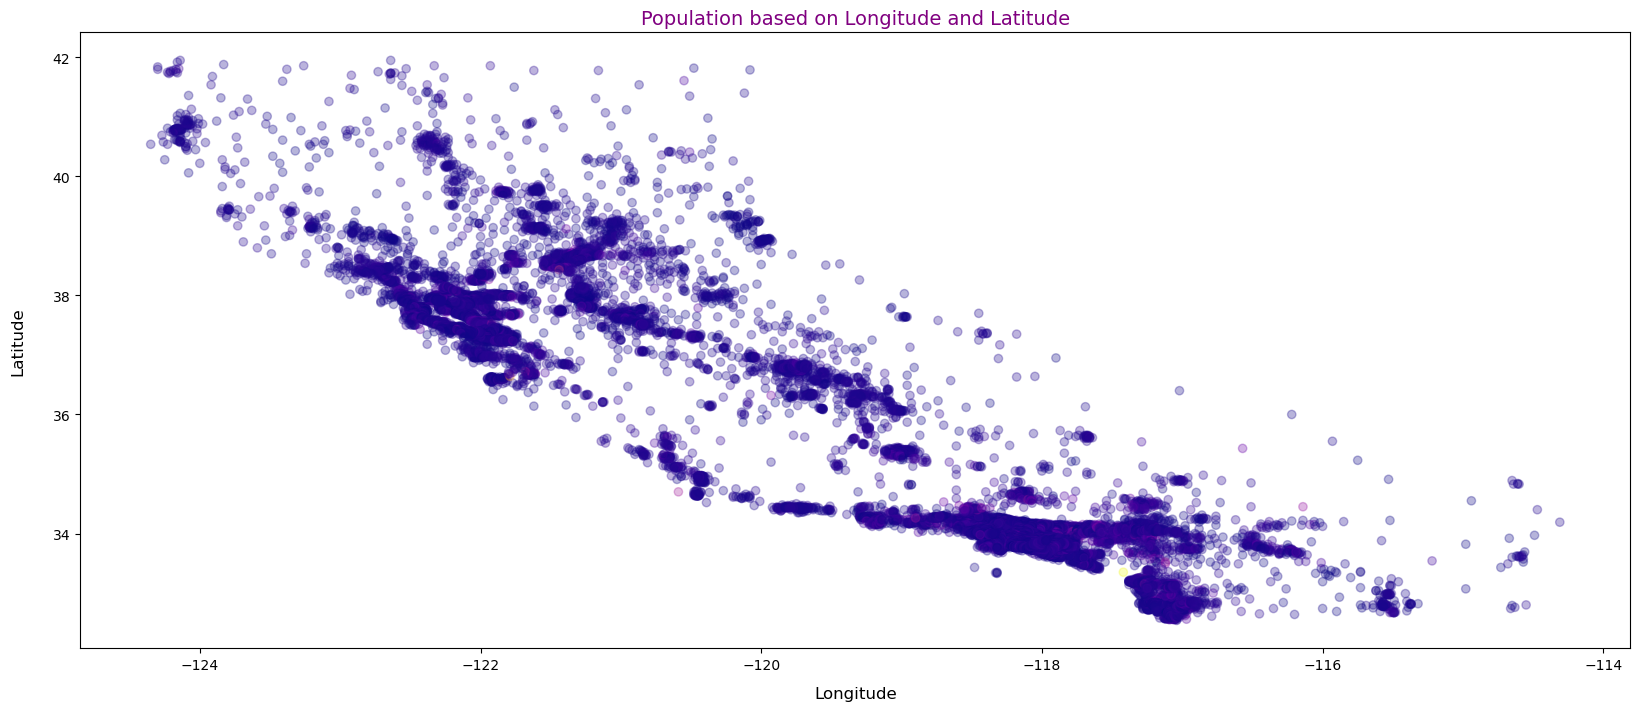

In [13]:
# Plot as a scatter plot the Population based on Latitude and Longitude to see how dense the population is in 
#specific areas
population = df["population"]
plt.figure(figsize = (20, 8))
long = df["longitude"]
lat = df["latitude"]
plt.scatter(x = long, y = lat, c = population, cmap = "plasma", alpha = 0.3)
plt.title("Population based on Longitude and Latitude", color = "purple", fontsize= 14.0)
plt.xlabel("Longitude", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Latitude", labelpad = 20, fontsize= 12.0)
plt.show()




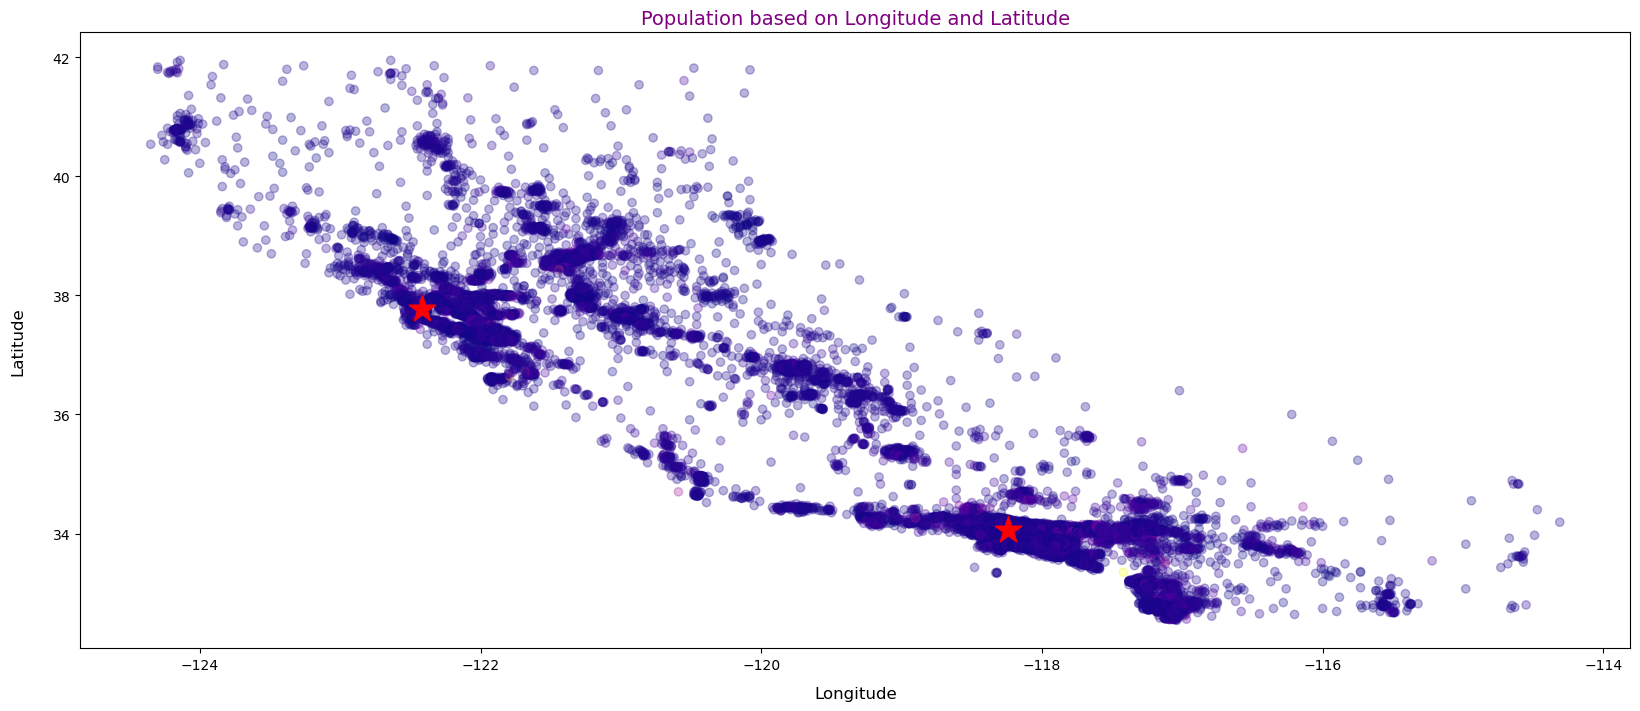

In [14]:
#Then plot where some major cities in California are located: like Los Angeles and San Francisco
population = df["population"]
plt.figure(figsize = (20, 8))
long = df["longitude"]
lat = df["latitude"]
plt.scatter(x = long, y = lat, c = population, cmap = "plasma", alpha = 0.3)
plt.scatter(-118.2437, 34.0522, c = "red", marker = "*", s = 400)
plt.scatter(-122.4194, 37.7749, c = "red", marker = "*", s = 400)
plt.title("Population based on Longitude and Latitude", color = "purple", fontsize= 14.0)
plt.xlabel("Longitude", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Latitude", labelpad = 20, fontsize= 12.0)
plt.show()


In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Avg Rooms', 'Avg Bedrooms',
       'Num People per Household'],
      dtype='object')

C:\Users\Irochka\AppData\Local\Temp\ipykernel_49756\427015209.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


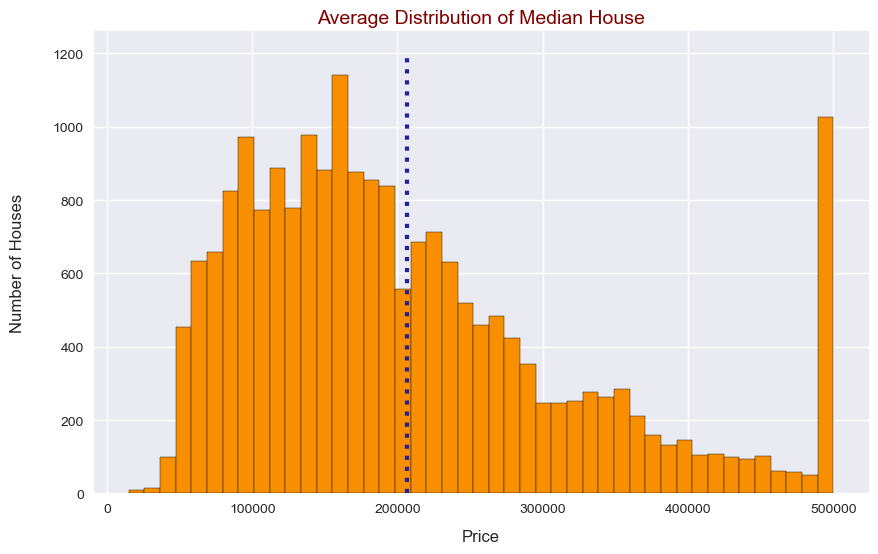

In [16]:
#Plot the Average Distribution of Median House Price as a "bar Histogram chart"

data = df["median_house_value"]
avg = data.mean()

plt.figure(figsize = (10, 6))   #sets size of graph
plt.style.use("seaborn")
plt.hist(data, bins = 45, ec = "black", color = "#f88f01")   #ec is the edge color of each bar in histogram
plt.vlines(avg, ymin = 0, ymax = 1200, color = "#21209c", linestyle = ":", linewidth = 3);
plt.title("Average Distribution of Median House", color = "maroon", fontsize= 14.0)
plt.xlabel("Price", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Number of Houses", labelpad = 20, fontsize= 12.0)
plt.show()


In [17]:
#Get rid of outlier at the end of the graph : don't include any houses over $500,000,000

condition = df["median_house_value"] > 500000
index_to_drop = df[condition].index

df.drop(index_to_drop, axis = 0, inplace = True)

C:\Users\Irochka\AppData\Local\Temp\ipykernel_49756\948554100.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


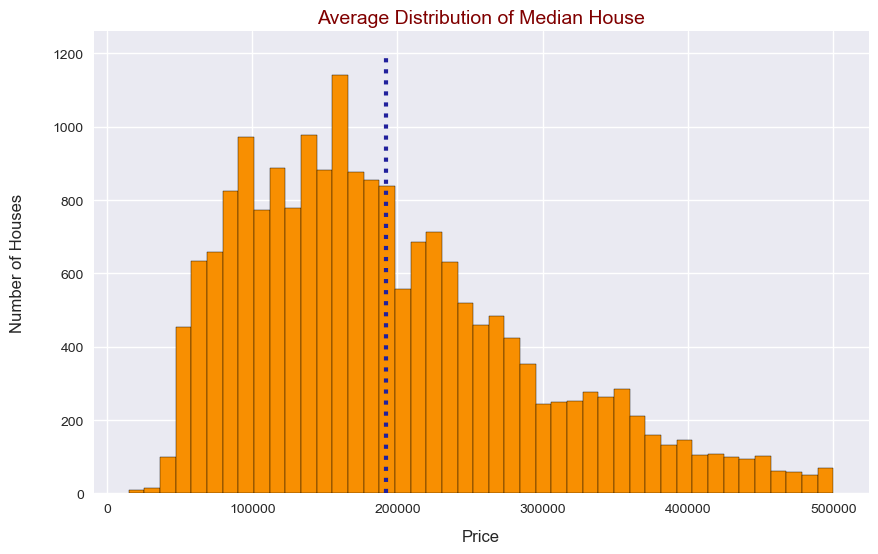

In [18]:
data = df["median_house_value"]
avg = data.mean()

plt.figure(figsize = (10, 6))   #sets size of graph
plt.style.use("seaborn")
plt.hist(data, bins = 45, ec = "black", color = "#f88f01")  #ec is the edge color of each bar in histogram
plt.vlines(avg, ymin = 0, ymax = 1200, color = "#21209c", linestyle = ":", linewidth = 3);
plt.title("Average Distribution of Median House", color = "maroon", fontsize= 14.0)
plt.xlabel("Price", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Number of Houses", labelpad = 20, fontsize= 12.0)
plt.show()


C:\Users\Irochka\AppData\Local\Temp\ipykernel_49756\1783373744.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


(0.0, 10.0)

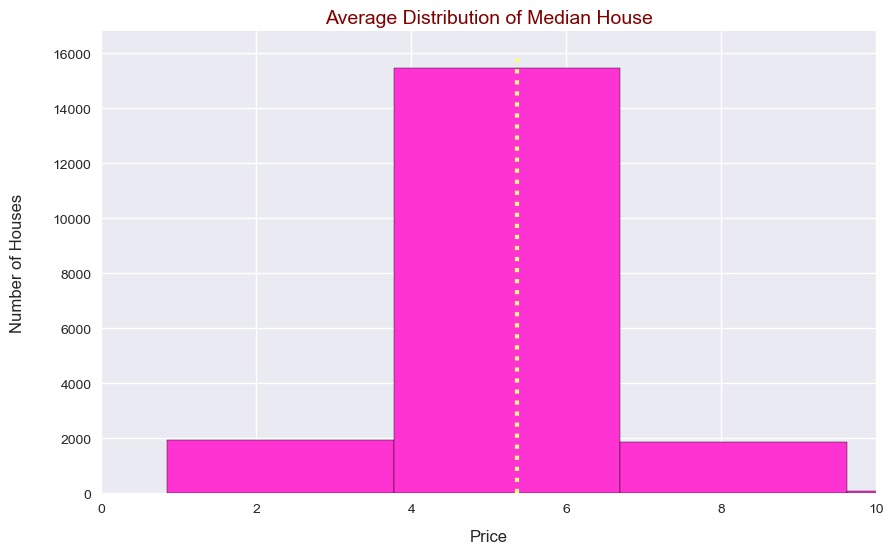

In [19]:
#Plot Average Distribution of Number of Rooms

rooms = df["Avg Rooms"]
avg_rooms = rooms.mean()

plt.figure(figsize = (10, 6))   #sets size of graph
plt.style.use("seaborn")
plt.hist(rooms, bins = 45, ec = "black", color = "#FF33D2")   #ec is the edge color of each bar in histogram
plt.vlines(avg_rooms, ymin = 0, ymax = 16000, color = "#FFFB82", linestyle = ":", linewidth = 3);
plt.title("Average Distribution of Median House", color = "maroon", fontsize= 14.0)
plt.xlabel("Price", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Number of Houses", labelpad = 20, fontsize= 12.0)
plt.xlim(0, 10)   #sets the limit of the x-axis. The x-axis will run from 0-10

<Figure size 1200x1000 with 0 Axes>

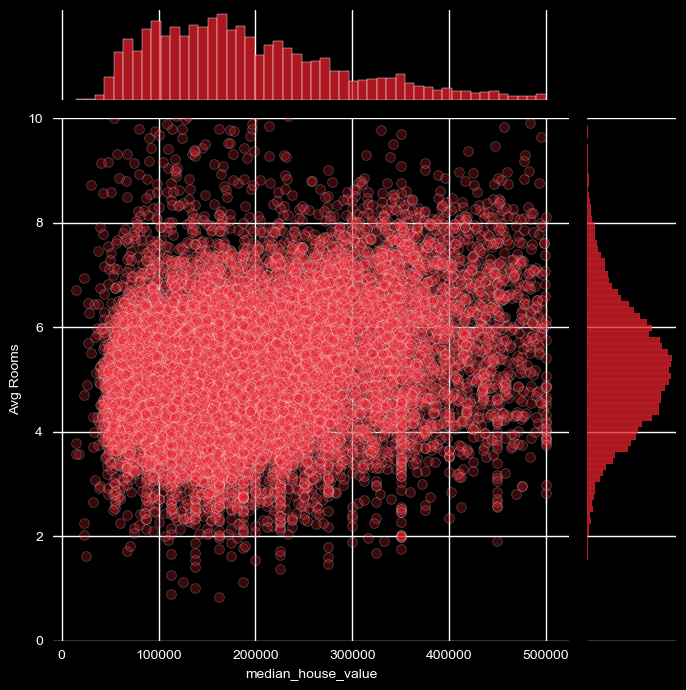

In [47]:
#Plot as a scatter the House Value vs Avg number of rooms
plt.figure(figsize = (12, 10))
plt.style.use("dark_background")
value = df["median_house_value"]
avg_rooms = df["Avg Rooms"]
sn.jointplot(x = value, y = avg_rooms, height = 7, color = "#E7202C", joint_kws = {"alpha": 0.25})
plt.ylim(0, 10);

#color = "#40EAC1"

In [21]:
df["median_house_value"].corr(df["Avg Rooms"])

0.1090067525377946

In [22]:
# How many unique areas are in "Ocean proximity" column
# count the number of houses in each area in "ocean proximity"
# plot them as a bar chart

df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
len(df["ocean_proximity"].unique())   #there are 5 options in ocean_proximity column

5

In [25]:
df.groupby("ocean_proximity").count().iloc[:, 1]

ocean_proximity
<1H OCEAN     8505
INLAND        6469
ISLAND           5
NEAR BAY      2077
NEAR OCEAN    2419
Name: latitude, dtype: int64

In [26]:
df["ocean_proximity"].value_counts()   #counts the number of times a specific house was one of the 5 unique ocean_proximity results

<1H OCEAN     8505
INLAND        6469
NEAR OCEAN    2419
NEAR BAY      2077
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Number of Houses by Area')

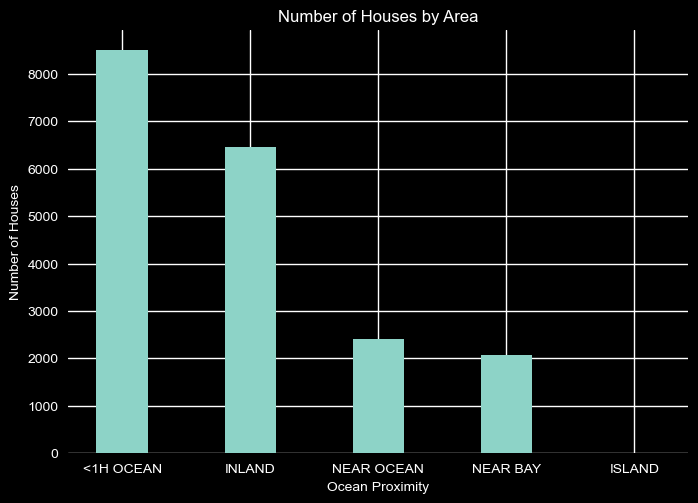

In [27]:
uniq_areas = df['ocean_proximity'].unique()
area_count = df['ocean_proximity'].value_counts()
plt.bar(area_count.index, area_count.values, width = 0.4)
plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Houses')
plt.title('Number of Houses by Area')

In [28]:
print(area_count)

<1H OCEAN     8505
INLAND        6469
NEAR OCEAN    2419
NEAR BAY      2077
ISLAND           5
Name: ocean_proximity, dtype: int64


In [29]:
print(uniq_areas)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Text(0.5, 1.0, 'Percentage of Unique types of Ocean Proximity')

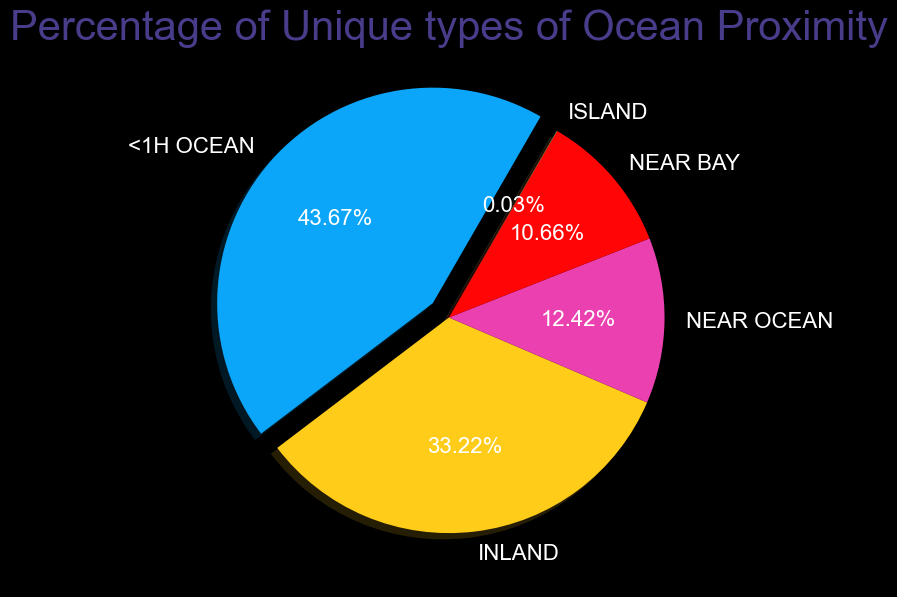

In [46]:
data = area_count.values
labels = area_count.index
c = ["#0BA6F9","#FFCC19", "#EA40B0", "#FF0505", "#5AF98A"]  #these are just the list of colors that I picked :) blue, yellow, violet, pink, and red
e = [0.1, 0, 0, 0, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.style.use("seaborn-v0_8-bright")
plt.figure(figsize=(8,7))   # Gives Width, height in inches
plt.pie(data, labels=labels, colors=c, autopct = '%.2f%%', explode=e, shadow = True, startangle = 60, pctdistance=0.6, textprops={'fontsize': 16,'color':"white"})
plt.title("Percentage of Unique types of Ocean Proximity", fontsize = 30, color = 'darkslateblue')
#plt.savefig("Percentage of Unique types of Ocean Proximity.jpg")



In [48]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Avg Rooms', 'Avg Bedrooms',
       'Num People per Household'],
      dtype='object')

## Use linear regression to predict housing prices in california based on the ocean proximity

In [50]:
#let's first build a seaborn heatmap matrix with the mask

corr_matrix = df.corr()
corr_matrix

C:\Users\Irochka\AppData\Local\Temp\ipykernel_49756\3235589225.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Avg Rooms,Avg Bedrooms,Num People per Household
longitude,1.000000,-0.924092,-0.103793,0.045081,0.069871,0.101488,0.056784,-0.009157,-0.046187,-0.029036,0.013167,0.002209
latitude,-0.924092,1.000000,0.007494,-0.033861,-0.067940,-0.113535,-0.073439,-0.077999,-0.148637,0.120956,0.073670,0.002066
housing_median_age,-0.103793,0.007494,1.000000,-0.371274,-0.327308,-0.294553,-0.309135,-0.194259,0.068595,-0.180652,-0.084934,0.014940
total_rooms,0.045081,-0.033861,-0.371274,1.000000,0.934147,0.859717,0.921620,0.223865,0.142188,0.145221,0.033669,-0.024394
total_bedrooms,0.069871,-0.067940,-0.327308,0.934147,1.000000,0.879176,0.979144,0.021903,0.074672,0.014388,0.050133,-0.028122
population,0.101488,-0.113535,-0.294553,0.859717,0.879176,1.000000,0.908940,0.042522,0.011153,-0.068591,-0.069621,0.070333
households,0.056784,-0.073439,-0.309135,0.921620,0.979144,0.908940,1.000000,0.046430,0.093890,-0.075879,-0.057850,-0.027143
median_income,-0.009157,-0.077999,-0.194259,0.223865,0.021903,0.042522,0.046430,1.000000,0.642733,0.324209,-0.065699,0.026322
median_house_value,-0.046187,-0.148637,0.068595,0.142188,0.074672,0.011153,0.093890,0.642733,1.000000,0.109007,-0.061081,-0.021388
Avg Rooms,-0.029036,0.120956,-0.180652,0.145221,0.014388,-0.068591,-0.075879,0.324209,0.109007,1.000000,0.843423,-0.005250


In [60]:
mask = np.zeros_like(corr_matrix)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True

<Axes: >

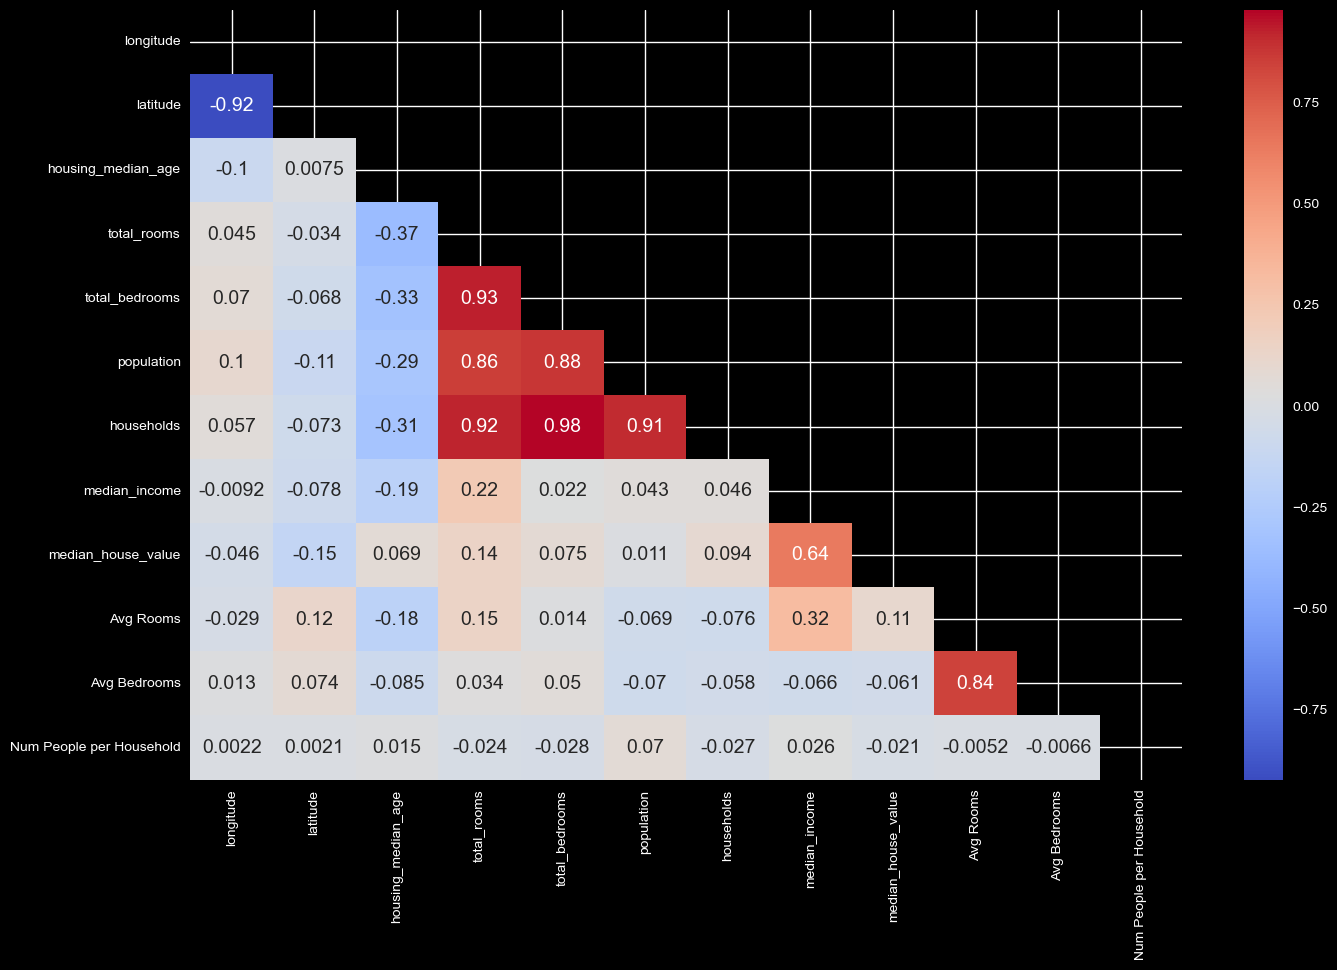

In [76]:
plt.figure(figsize=(16, 10))
plt.style.use("dark_background")
sns.heatmap(corr_matrix, annot = True, mask = mask, cmap = "coolwarm", annot_kws = {"size": 14})

In [62]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Avg Rooms', 'Avg Bedrooms',
       'Num People per Household'],
      dtype='object')

In [63]:
#Now replace proximity to the ocean values with get_dummies and concatinate get_dummies to the dataframe

dummies = pd.get_dummies(df["ocean_proximity"])
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [64]:
df = pd.concat([dummies, df], axis = 1)
df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Avg Rooms,Avg Bedrooms,Num People per Household
0,0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,0,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,0,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,0,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,0,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,1,0,0,0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,0,1,0,0,0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,0,1,0,0,0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,0,1,0,0,0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [65]:
#List all the columns that you want to use as independent variables and then put house_value for dependent variable

X = df[["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN", "median_income", "Avg Rooms", "Avg Bedrooms"]]
#you could also do: X = df.drop(columns = ["ocean_proximity", "median_house_value", etc...])
y = df["median_house_value"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
model.score(X_test, y_test)

0.572768542688411

In [73]:
df_predicted = pd.DataFrame()
df_predicted["Predicted"] = model.predict(X_test)
df_predicted["Actual"] = y_test.values
#df_predicted
X_test.reset_index(drop = True, inplace = True)
test = pd.concat([X_test, df_predicted], axis = 1) 
test["Difference"] = abs(test["Predicted"] - test["Actual"])
test

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income,Avg Rooms,Avg Bedrooms,Predicted,Actual,Difference
0,1,0,0,0,0,3.1679,5.080963,1.133479,193671.852293,110000.0,83671.852293
1,0,0,0,1,0,2.3357,4.064935,0.990260,182434.268951,175000.0,7434.268951
2,0,1,0,0,0,3.4545,5.288991,0.978593,130342.213081,89800.0,40542.213081
3,1,0,0,0,0,2.5301,3.452970,0.980198,176094.537318,192900.0,16805.462682
4,0,1,0,0,0,3.8594,5.413793,0.954023,144537.026472,90800.0,53737.026472
...,...,...,...,...,...,...,...,...,...,...,...
3890,0,1,0,0,0,2.3507,5.531073,1.042373,86026.486843,97600.0,11573.513157
3891,0,1,0,0,0,1.7462,4.681159,0.975845,66409.317899,51100.0,15309.317899
3892,1,0,0,0,0,6.1401,6.305800,1.014060,297721.219538,243200.0,54521.219538
3893,0,1,0,0,0,2.8323,5.386805,1.050453,107347.731107,50800.0,56547.731107
